# Desenvolvimento do Corona por UF
Esse trabalho mostra quantos dias demorou para cada estado ter seu desenvolvimento de casos.

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Importing the Excel file with all the cities
covid_munic = pd.read_excel("cos_full_mun.xlsx")
covid_munic.head(2)

,COD_MUN,latitude,longitude,COD_UF,DS_MUN,DS_MESO,DS_UF,date,epidemiological_week,estimated_population_2019,...,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,1100015.0,-11.9283,-61.9953,11.0,Alta Floresta D'Oeste,Leste Rondoniense,Rondônia,2020-05-02,18,22945.0,...,1,435825.0,2020-05-02,0.0,0,1,city,RO,1,0
1,1100015.0,-11.9283,-61.9953,11.0,Alta Floresta D'Oeste,Leste Rondoniense,Rondônia,2020-05-03,19,22945.0,...,1,435825.0,2020-05-03,0.0,0,2,city,RO,0,0


In [3]:
print("Last updated in: {:%d/%m/%Y}".format(max(covid_munic["date"])))

Last updated in: 13/05/2020


In [4]:
# We just need it by UF, so let's aggregate them
# Only leaving cases where we have at least one confirmed or one death
# And then create a cumulative frequency for confirmed cases and death 

covid_uf = covid_munic.groupby(["state", "date"])["new_confirmed", "new_deaths"].sum().reset_index()

covid_uf = covid_uf[(covid_uf["new_confirmed"] > 0) | (covid_uf["new_deaths"] > 0)]

covid_uf["date"] = pd.to_datetime(covid_uf['date'], format="%Y/%m/%d")

covid_uf['Cumulative Confirmed'] = covid_uf.groupby('state')['new_confirmed'].cumsum()
covid_uf['Cumulative Death'] = covid_uf.groupby('state')['new_deaths'].cumsum()
covid_uf.tail(2)

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,state,date,new_confirmed,new_deaths,Cumulative Confirmed,Cumulative Death
1654,TO,2020-05-10,59,1,747,12
1655,TO,2020-05-11,81,2,828,14


In [5]:
print("First date: {:%d/%m/%Y}".format(min(covid_uf["date"])))
print("Last updated in: {:%d/%m/%Y}".format(max(covid_uf["date"])))

First date: 25/02/2020
Last updated in: 13/05/2020


In [6]:
covid_uf.groupby("date")["state"].count().tail(5)

date
2020-05-09    25
2020-05-10    25
2020-05-11    27
2020-05-12    23
2020-05-13     3
Name: state, dtype: int64

In [7]:
# Because we only have 3 states on our last date, we will delete it
covid_uf = covid_uf[ covid_uf["date"] < max(covid_uf["date"])]
print("We have {} states with last updated in: {:%d/%m/%Y}".
      format(covid_uf[covid_uf["date"] == max(covid_uf["date"])] ["state"].count(), 
             max(covid_uf["date"])))

We have 23 states with last updated in: 12/05/2020


In [8]:
# Getting first cases in Brazil for confirmed and death
last_updated = max(covid_uf["date"])
first_br_confirmed = covid_uf[covid_uf["new_confirmed"] > 0]["date"].min()
first_br_death = covid_uf[covid_uf["new_deaths"] > 0]["date"].min()
print("First confirmed and death in Brasil: {:%d/%m/%Y} and {:%d/%m/%Y}".format(first_br_confirmed, first_br_death))

First confirmed and death in Brasil: 25/02/2020 and 17/03/2020


In [9]:
# Now let's get a summary for the UF
covid_uf_summary = covid_uf.groupby("state")["new_confirmed", "new_deaths"].sum().sort_values(by="new_confirmed", ascending = False)

covid_uf_summary["Date Case 1 in UF"] = covid_uf[covid_uf["new_confirmed"] > 0].groupby("state")["date"].min()
covid_uf_summary["Date first death in UF"] = covid_uf[covid_uf["new_deaths"] > 0].groupby("state")["date"].min()
covid_uf_summary["Dias entre Caso 1 brasileiro e Caso 1 na UF"] = (covid_uf_summary["Date Case 1 in UF"] - first_br_confirmed).dt.days
covid_uf_summary["Dias entre Caso 1 brasileiro e morte na UF"] = (covid_uf_summary["Date first death in UF"] - first_br_confirmed).dt.days

#Creating variables for each slice - YOU CAN CHANGE THOSE NUMBERS IF YOU WANT
cases_slice = [1, 100, 250, 500, 1000, 2000, 5000, 10000]
for s in range(1, len(cases_slice)):
    num_cases = cases_slice[s]
    num_cases_pre = cases_slice[s-1]
    covid_uf_summary["Date Case {} in UF".format(str(num_cases
                                                    ))] = covid_uf[covid_uf["Cumulative Confirmed"] > 
                                                                   num_cases].groupby("state")["date"].min()
    covid_uf_summary["Dias entre Caso {} e {} na UF".format(
        str(num_cases_pre), str(num_cases))] = (covid_uf_summary["Date Case {} in UF".format(str(num_cases
                                                    ))] - covid_uf_summary["Date Case {} in UF".format(str(num_cases_pre
                                                    ))]).dt.days
    

covid_uf_summary.tail(2)

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,new_confirmed,new_deaths,Date Case 1 in UF,Date first death in UF,Dias entre Caso 1 brasileiro e Caso 1 na UF,Dias entre Caso 1 brasileiro e morte na UF,Date Case 100 in UF,Dias entre Caso 1 e 100 na UF,Date Case 250 in UF,Dias entre Caso 100 e 250 na UF,Date Case 500 in UF,Dias entre Caso 250 e 500 na UF,Date Case 1000 in UF,Dias entre Caso 500 e 1000 na UF,Date Case 2000 in UF,Dias entre Caso 1000 e 2000 na UF,Date Case 5000 in UF,Dias entre Caso 2000 e 5000 na UF,Date Case 10000 in UF,Dias entre Caso 5000 e 10000 na UF
state,,,,,,,,,,,,,,,,,,,,
MT,604,20,2020-03-20,2020-04-03,24,38,2020-04-09,20,2020-04-27,18,2020-05-09,12.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
MS,405,12,2020-03-14,2020-03-31,18,35,2020-04-12,29,2020-04-30,18,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [17]:
columns_for_graph = [k for k in list(covid_uf_summary.columns)  if 'Dias entre Caso' in k]
columns_for_graph.remove('Dias entre Caso 1 brasileiro e morte na UF')
columns_for_graph

['Dias entre Caso 1 brasileiro e Caso 1 na UF',
 'Dias entre Caso 1 e 100 na UF',
 'Dias entre Caso 100 e 250 na UF',
 'Dias entre Caso 250 e 500 na UF',
 'Dias entre Caso 500 e 1000 na UF',
 'Dias entre Caso 1000 e 2000 na UF',
 'Dias entre Caso 2000 e 5000 na UF',
 'Dias entre Caso 5000 e 10000 na UF']

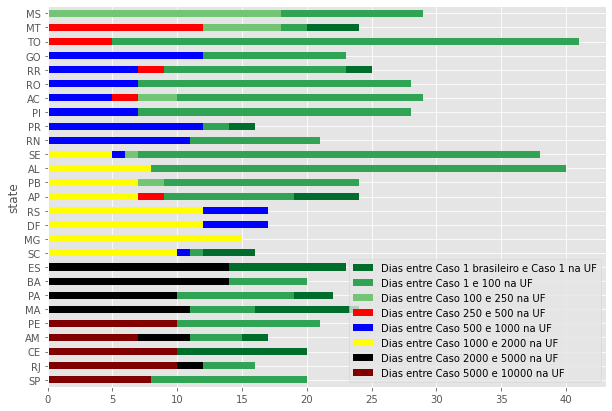

In [32]:
# Taken from here: https://pstblog.com/2016/10/04/stacked-charts

fig, ax = plt.subplots(figsize=(10,7)) 
matplotlib.style.use('ggplot')

margin_bottom = np.zeros(len(covid_uf_summary.reset_index()['state'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476", "red", "blue", "yellow", "black", "maroon"]

for num, month in enumerate(columns_for_graph):

    covid_uf_summary.reset_index().plot.barh(x="state",y=columns_for_graph[num], ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=columns_for_graph[num])
    margin_bottom += covid_uf_summary[columns_for_graph[num]]

plt.show()